In [1]:
%matplotlib inline

In [2]:
from os import path,listdir

In [3]:
import re

In [4]:
import pandas as pd

In [5]:
case="./ras"

In [6]:
tablesDir=path.join(case,"tables")

In [7]:
rawTables={}
tableFileRExp=re.compile("Table_([0-9]+).csv")
for f in listdir(tablesDir):
    m=tableFileRExp.match(f)
    if m:
        val=int(m.group(1))
        rawTables[val]=pd.read_csv(path.join(tablesDir,f))

Check number of variables in the files

In [8]:
pd.Series(dict((k,len(rawTables[k].keys())) for k in rawTables))

0       55
10      59
30      55
100     55
150     55
200     55
250     55
300    108
325     55
350     55
375     55
400     55
420     55
430     55
432     55
433     55
dtype: int64

Plot first and second $H_2$

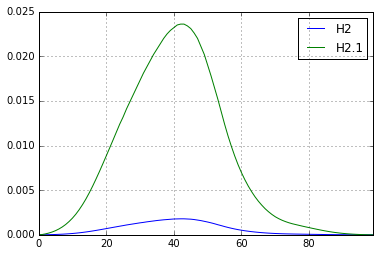

In [9]:
rawTables[300][["H2","H2.1"]].plot()

For comparison: $H_2$ from another Table

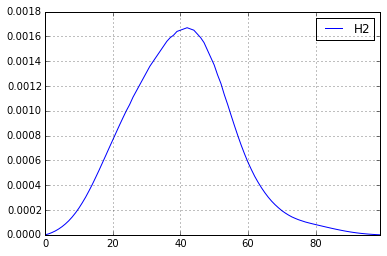

In [11]:
rawTables[350][["H2"]].plot()

Get names of the duplicates

In [12]:
tooMuch=[k for k in range(len(rawTables[300].keys())) if rawTables[300].keys()[k][-2:]==".1"]

In [13]:
wrong=[k for k in rawTables[300].keys() if k[-2:]==".1"]

In [14]:
cleaned=rawTables[300].drop(wrong,axis=1)

In [15]:
cleaned.to_csv("Table_300_cleaned.csv",index=False)

Another table with extra values

In [16]:
set(rawTables[10].keys())-set(rawTables[0].keys())

{'coord', 'node', 'u+', 'v'}

In [17]:
set(rawTables[0].keys())-set(rawTables[10].keys())

set()